<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Импорт данных

In [16]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates). 
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [18]:
# Вывод размеров датасета
print("Размеры датасета:", data.shape)

# Проверка наличия дубликатов
duplicates = data.duplicated()
print("Количество дубликатов:", duplicates.sum())

# Удаление дубликатов
data = data.drop_duplicates()
print("Размеры датасета после удаления дубликатов:", data.shape)

Размеры датасета: (6000, 9)
Количество дубликатов: 0
Размеры датасета после удаления дубликатов: (6000, 9)


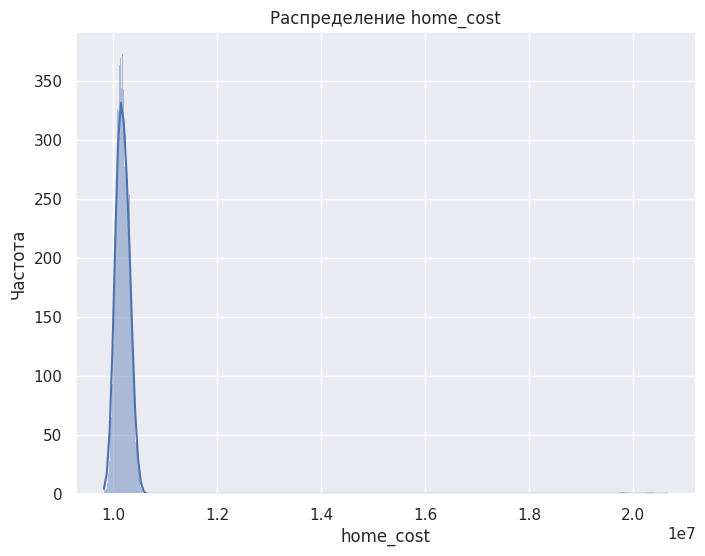

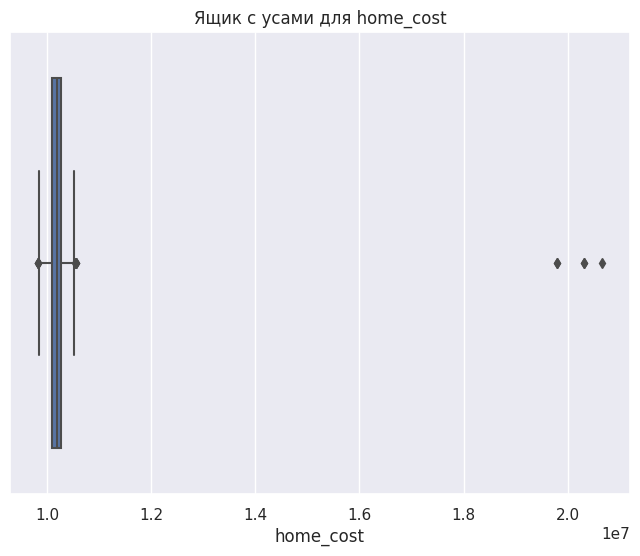

In [20]:
# Гистограмма распределения home_cost
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='home_cost', kde=True)
plt.title('Распределение home_cost')
plt.xlabel('home_cost')
plt.ylabel('Частота')
plt.show()

# Ящик с усами для home_cost
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='home_cost')
plt.title('Ящик с усами для home_cost')
plt.xlabel('home_cost')
plt.show()

Размеры датасета после удаления выбросов: (5987, 9)


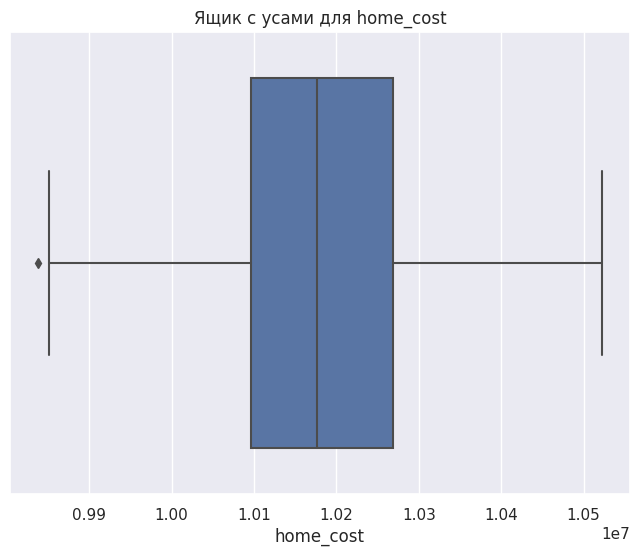

In [23]:
# Определение границ выбросов
Q1 = data['home_cost'].quantile(0.25)
Q3 = data['home_cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
filtered_data = data[(data['home_cost'] >= lower_bound) & (data['home_cost'] <= upper_bound)]

print("Размеры датасета после удаления выбросов:", filtered_data.shape)

# Ящик с усами для home_cost
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, x='home_cost')
plt.title('Ящик с усами для home_cost')
plt.xlabel('home_cost')
plt.show()

# Проверка гипотез

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

In [33]:
def t_test(group1, group2):
    import scipy.stats as stats

    # Проведение t-теста
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    alpha = 0.05  # Уровень значимости

    if p_value < alpha:
        conclusion = "Отвергаем нулевую гипотезу"
    else:
        conclusion = "Не отвергаем нулевую гипотезу"

    print("Результаты t-теста:")
    print("t-статистика:", t_statistic)
    print("p-значение:", p_value)
    print(conclusion)

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

In [34]:
# Разделение данных на две группы по полу
male_salaries = filtered_data[filtered_data['sex'] == 1]['salary']
female_salaries = filtered_data[filtered_data['sex'] == 0]['salary']

t_test(male_salaries, female_salaries)

Результаты t-теста:
t-статистика: 19.120734501379925
p-значение: 3.7404230251868476e-79
Отвергаем нулевую гипотезу


* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

In [36]:
# Разделение данных на две группы по профессии
engineer_salaries = filtered_data[filtered_data['profession'] == 'Engineer']['salary']
entertainment_salaries = filtered_data[filtered_data['profession'] == 'Entertainment']['salary']

t_test(engineer_salaries, entertainment_salaries)

Результаты t-теста:
t-статистика: -100.1518525116712
p-значение: 0.0
Отвергаем нулевую гипотезу


* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

In [37]:
# Разделение данных на две группы по количеству детей
more_than_3_children_salaries = filtered_data[filtered_data['children'] > 3]['salary']
less_or_equal_3_children_salaries = filtered_data[filtered_data['children'] <= 3]['salary']

t_test(more_than_3_children_salaries, less_or_equal_3_children_salaries)

Результаты t-теста:
t-статистика: 24.713318726825975
p-значение: 1.7626205893564625e-128
Отвергаем нулевую гипотезу


* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

In [39]:
# Разделение данных на две группы по профессии
artist_home_costs = filtered_data[filtered_data['profession'] == 'Artist']['home_cost']
lawyer_home_costs = filtered_data[filtered_data['profession'] == 'Lawyer']['home_cost']

t_test(artist_home_costs, lawyer_home_costs)

Результаты t-теста:
t-статистика: -10.312443126358874
p-значение: 4.808361776839644e-24
Отвергаем нулевую гипотезу


* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


In [40]:
# Разделение данных на две группы по наличию брака
married_home_costs = filtered_data[filtered_data['was_married'] == 1]['home_cost']
not_married_home_costs = filtered_data[filtered_data['was_married'] == 0]['home_cost']

t_test(married_home_costs, not_married_home_costs)

Результаты t-теста:
t-статистика: -27.941160137149474
p-значение: 1.360651636221332e-161
Отвергаем нулевую гипотезу


* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [48]:
from statsmodels.stats.proportion import proportion_confint

# Разделение данных на две группы по полу
male_married = filtered_data[(filtered_data['sex'] == 1) & (filtered_data['was_married'] == 1)]
female_married = filtered_data[(filtered_data['sex'] == 0) & (filtered_data['was_married'] == 1)]

# Вычисление доли брака для каждой группы
male_married_proportion = len(male_married) / len(filtered_data[filtered_data['sex'] == 1])
female_married_proportion = len(female_married) / len(filtered_data[filtered_data['sex'] == 0])

# Вычисление доверительных интервалов для долей
male_confint = proportion_confint(len(male_married), len(filtered_data[filtered_data['sex'] == 1]), alpha=0.05,
                                  method='normal')
female_confint = proportion_confint(len(female_married), len(filtered_data[filtered_data['sex'] == 0]), alpha=0.05,
                                    method='normal')

# Проверка статистической значимости различия в долях
if male_confint[0] > female_confint[1] or male_confint[1] < female_confint[0]:
    conclusion = "Отвергаем нулевую гипотезу"
else:
    conclusion = "Не отвергаем нулевую гипотезу"

print("Результаты анализа долей:")
print("Доля брака у мужчин:", male_married_proportion)
print("Доля брака у женщин:", female_married_proportion)
print("Доверительный интервал для доли брака у мужчин:", male_confint)
print("Доверительный интервал для доли брака у женщин:", female_confint)
print(conclusion)

Результаты анализа долей:
Доля брака у мужчин: 0.9301210898082745
Доля брака у женщин: 0.6697973306969847
Доверительный интервал для доли брака у мужчин: (0.9221846801741234, 0.9380574994424256)
Доверительный интервал для доли брака у женщин: (0.6493040189945092, 0.6902906423994601)
Отвергаем нулевую гипотезу


Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

In [47]:
# Разделение данных на две группы по полу и зарплате
female_above_median_salary = \
filtered_data[(filtered_data['sex'] == 0) & (filtered_data['salary'] > filtered_data['salary'].median())]['happyness']
male_above_mean_salary = \
filtered_data[(filtered_data['sex'] == 1) & (filtered_data['salary'] > filtered_data['salary'].mean())]['happyness']

t_test(female_above_median_salary, male_above_mean_salary)


Результаты t-теста:
t-статистика: -36.461965470429796
p-значение: 7.1919166371584326e-236
Отвергаем нулевую гипотезу
